## K-Nearest Neighbor classification (KNN)



## 0

-----

## A

-----

In [1]:
from tensorflow import keras
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    

Efter att du har kört koden blir det följande: 

X_train.npy: Träningsbilderna.

y_train.npy: Etiketterna för träningsbilderna.

X_test.npy: Testbilderna.

y_test.npy: Etiketterna för testbilderna.

In [3]:
from tensorflow import keras
import numpy as np
import os


data_dir = 'Data'


# Ladda MNIST-datasetet
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Spara datan i mappen 'Data'
np.save(os.path.join(data_dir, 'X_train.npy'), X_train)
np.save(os.path.join(data_dir, 'y_train.npy'), y_train)
np.save(os.path.join(data_dir, 'X_test.npy'), X_test)
np.save(os.path.join(data_dir, 'y_test.npy'), y_test)

print(f"Datan har sparats i mappen '{data_dir}'.")

Datan har sparats i mappen 'Data'.


## B

------

### Förklaring av formen på MNIST-datasetet

#### **`X_train` och `X_test`**
- **Form**:  
  - `X_train`: `(60000, 28, 28)`  
  - `X_test`: `(10000, 28, 28)`  
- **Betydelse**:  
  - `X_train` innehåller **60000 bilder** och `X_test` innehåller **10000 bilder**.  
  - Varje bild är **28x28 pixlar**, vilket innebär att varje bild representeras som en 2D-matris med 28 rader och 28 kolumner.

#### **`y_train` och `y_test`**
- **Form**:  
  - `y_train`: `(60000,)`  
  - `y_test`: `(10000,)`  
- **Betydelse**:  
  - `y_train` innehåller **60000 etiketter** och `y_test` innehåller **10000 etiketter**.  
  - Varje etikett är en **siffra från 0 till 9** som representerar vilken siffra bilden visar.

### Sammanfattning
MNIST-datasetet består av **träningsdata** (`X_train`, `y_train`) och **testdata** (`X_test`, `y_test`). Träningsdatan används för att träna modellen, medan testdatan används för att utvärdera modellens prestanda. Varje bild är en **28x28 pixel** representation av en handskriven siffra, och varje etikett anger vilken siffra bilden visar.

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


## C

----

In [5]:
print(f"Antal bilder i X_train: {X_train.shape[0]}")

Antal bilder i X_train: 60000


## D

------
### Förklaring av koden

#### **`sample_image.min()` och `sample_image.max()`**
- **Syfte**:  
  Dessa funktioner returnerar det **minsta** och **största värdet** i bilden.  
- **Betydelse**:  
  Dessa värden representerar pixelintensiteten, där **0** vanligtvis är svart och **255** är vitt.

#### **`plt.imshow()`**
- **Syfte**:  
  Denna funktion visar bilden som en **28x28 pixel** gråskalebild.  
- **Parametrar**:  
  - `cmap='gray'`: Använder en gråskalefärgkarta för att representera bilden.

#### **`plt.colorbar()`**
- **Syfte**:  
  Lägger till en **färgskala** bredvid bilden för att visa pixelintensiteten.  
- **Betydelse**:  
  Färgskalan hjälper till att förstå hur pixelvärdena motsvarar ljushet/mörker i bilden.

### Resultat
- Du kommer att se det **minsta** och **största värdet** i bilden (vanligtvis **0** och **255**).  
- Bilden kommer att visas som en **28x28 pixel** gråskalebild, där **högre värden** representerar **mörkare pixlar**.

Minsta värde i bilden: 0
Största värde i bilden: 255


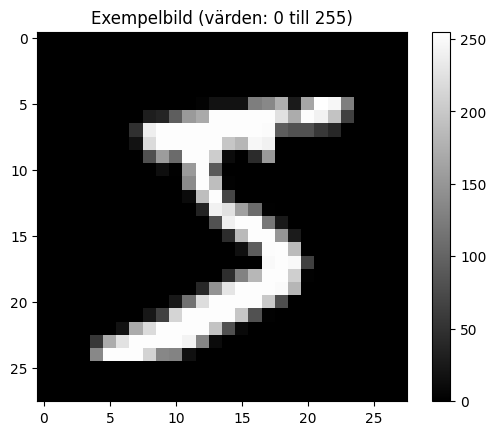

In [6]:
import matplotlib.pyplot as plt

# Välj en valfri bild (t.ex. den första bilden i X_train)
sample_image = X_train[0]

# Hitta det minsta och största värdet i bilden
min_value = sample_image.min()
max_value = sample_image.max()

print(f"Minsta värde i bilden: {min_value}")
print(f"Största värde i bilden: {max_value}")

# Plotta bilden
plt.imshow(sample_image, cmap='gray')
plt.title(f"Exempelbild (värden: {min_value} till {max_value})")
plt.colorbar()
plt.show()

## E

-----

### Förklaring av koden

#### **`np.random.choice()`**
- **Syfte**:  
  Väljer **20 slumpmässiga index** från `X_train` utan att välja samma bild flera gånger (`replace=False`).  
- **Betydelse**:  
  Säkerställer att varje bild i urvalet är unik.

#### **`plt.subplot()`**
- **Syfte**:  
  Skapar en **grid** med **4 rader** och **5 kolumner** för att visa de 20 bilderna.  
- **Betydelse**:  
  Organiserar bilderna i ett strukturerat format för bättre visning.

#### **`plt.imshow()`**
- **Syfte**:  
  Visar varje bild i **gråskala** (`cmap='gray'`).  
- **Betydelse**:  
  Gråskala är lämpligt för att representera MNIST-bilder, där högre pixelvärden motsvarar mörkare områden.

#### **`plt.title()`**
- **Syfte**:  
  Visar **etiketten** (siffran) för varje bild.  
- **Betydelse**:  
  Ger kontext till varje bild genom att visa vilken siffra den representerar.

#### **`plt.axis('off')`**
- **Syfte**:  
  Tar bort **axlar** för en renare visning.  
- **Betydelse**:  
  Förbättrar estetiken och fokuserar på bilderna istället för axlar.

### Resultat
Du kommer att se en **grid** med **20 slumpmässigt valda bilder** från `X_train`, där varje bild har sin korresponderande **etikett (siffra)** som titel.


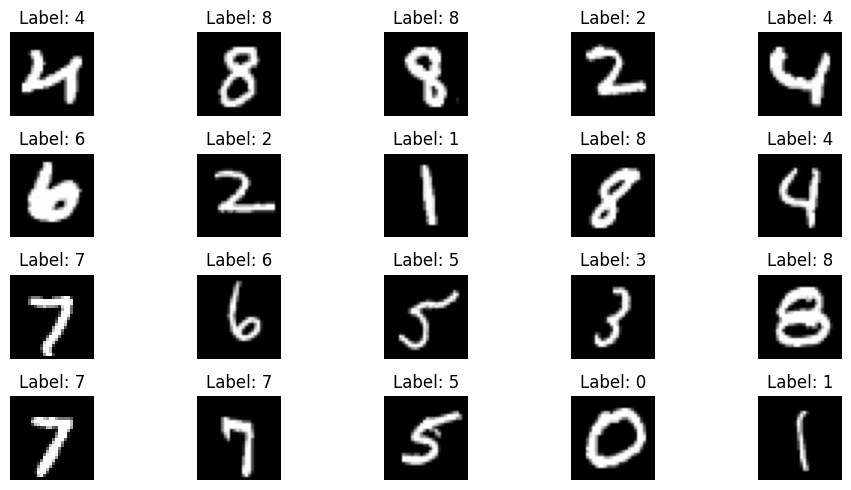

In [7]:


# Välj 20 slumpmässiga bilder från X_train
random_indices = np.random.choice(X_train.shape[0], 20, replace=False)
sample_images = X_train[random_indices]

# Skapa en figur för att visa bilderna
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)  # 4 rader, 5 kolumner
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Label: {y_train[random_indices[i]]}")
    plt.axis('off')  # Ta bort axlar för bättre visning

plt.tight_layout()
plt.show()

## F

-----

### Förklaring av koden

#### **`X_train.reshape(X_train.shape[0], -1)`**
- **Syfte**:  
  Omformar `X_train` från en **3D-tensor** till en **2D-matris**.  
- **Parametrar**:  
  - `X_train.shape[0]`: Behåller **antalet bilder** (60000).  
  - `-1`: Beräknar automatiskt **antalet kolumner** som behövs för att bevara alla pixlar (28 * 28 = 784).  
- **Betydelse**:  
  Varje bild som tidigare var en **28x28 matris** (784 pixlar) är nu en **rad** med **784 kolumner** i en 2D-matris.

#### **`X_test.reshape(X_test.shape[0], -1)`**
- **Syfte**:  
  Omformar `X_test` från en **3D-tensor** till en **2D-matris**.  
- **Parametrar**:  
  - Samma princip gäller som för `X_train`, men med **10000 bilder**.  
- **Betydelse**:  
  Varje bild i `X_test` blir också en **rad** med **784 kolumner** i en 2D-matris.

### Sammanfattning
Omformningen gör att datan är kompatibel med KNN-klassificeraren i scikit-learn, som kräver **2D-matriser** som indata.

In [8]:
# Omforma X_train och X_test till 2D-matriser
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Visa den nya formen
print(f"X_train omformad: {X_train_reshaped.shape}")
print(f"X_test omformad: {X_test_reshaped.shape}")

X_train omformad: (60000, 784)
X_test omformad: (10000, 784)
